In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.font_manager as fm  
font_list = [font.name for font in fm.fontManager.ttflist] 
font_list
plt.rcParams['font.family'] = 'Malgun Gothic' 

<AxesSubplot:title={'center':'전체 국가 중 운항노선 Top10'}, xlabel='국가', ylabel='운항'>

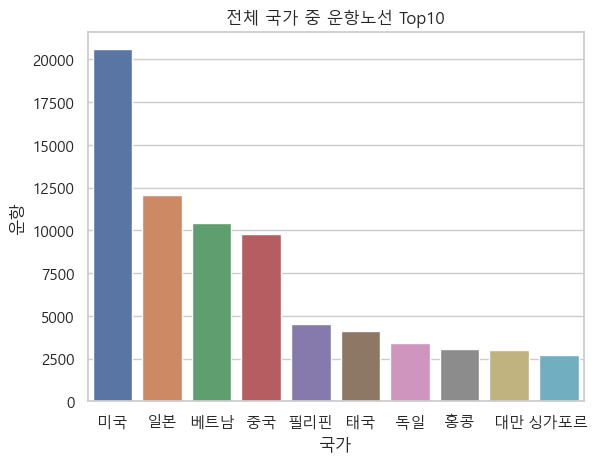

In [5]:
flight = pd.read_csv('../data/flight.csv', encoding = 'cp949')
top = flight.sort_values('운항', ascending = False)
top = top[:10]
sns.set_theme(style="whitegrid") 
plt.rcParams['font.family'] = 'Malgun Gothic'
x = top['국가']
y = top['운항'] 
plt.title('전체 국가 중 운항노선 Top10')
sns.barplot(x=x, y=y)

<AxesSubplot:title={'center':'전체 국가 중 승객수 Top10'}, xlabel='국가', ylabel='여객'>

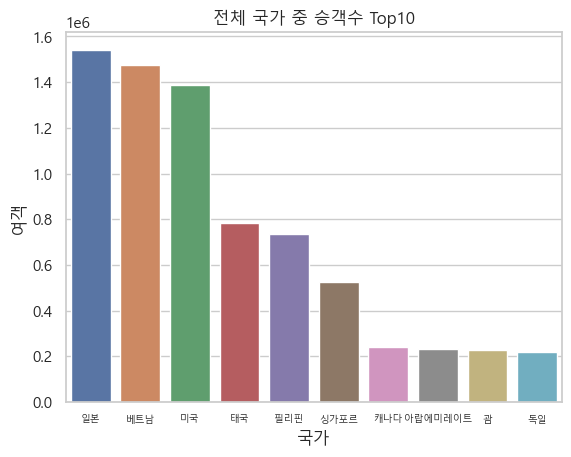

In [12]:
top = flight.sort_values('여객', ascending = False)
top = top[:10]
sns.set_theme(style="whitegrid") 
plt.rcParams['font.family'] = 'Malgun Gothic'
x = top['국가']
y = top['여객'] 
plt.title('전체 국가 중 승객수 Top10')
plt.xticks(fontsize =7)
sns.barplot(x=x, y=y)

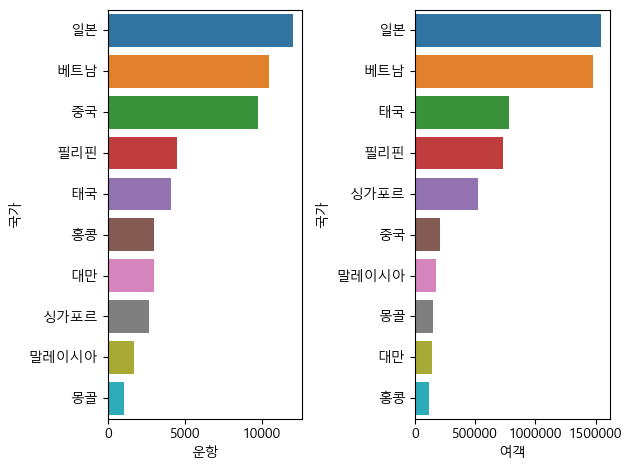

In [4]:

asia = flight[flight['지역']=='아시아']
asia = asia.sort_values('운항', ascending = False)[:10]
fig, ax = plt.subplots(ncols=2)
sns.barplot(data = asia,
           y = asia['국가'],
           x = asia['운항'], orient ='h', ax = ax[0])
asia = asia.sort_values('여객', ascending = False)
sns.barplot(data = asia,
           y = asia['국가'],
           x = asia['여객'], orient ='h', ax = ax[1])
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.tight_layout()

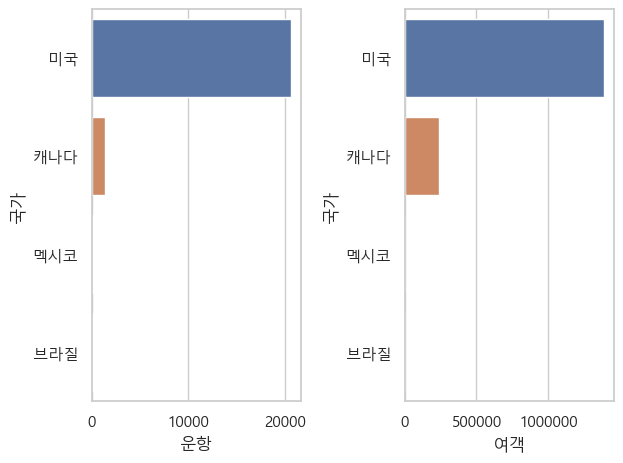

In [7]:
usa = flight[flight['지역']=='미주']
usa = usa.sort_values('운항', ascending = False)[:10]
fig, ax = plt.subplots(ncols=2)
sns.barplot(data = usa,
           y = usa['국가'],
           x = usa['운항'], orient ='h', ax = ax[0])
usa = usa.sort_values('여객', ascending = False)
sns.barplot(data = usa,
           y = usa['국가'],
           x = usa['여객'], orient ='h', ax = ax[1])
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.tight_layout()

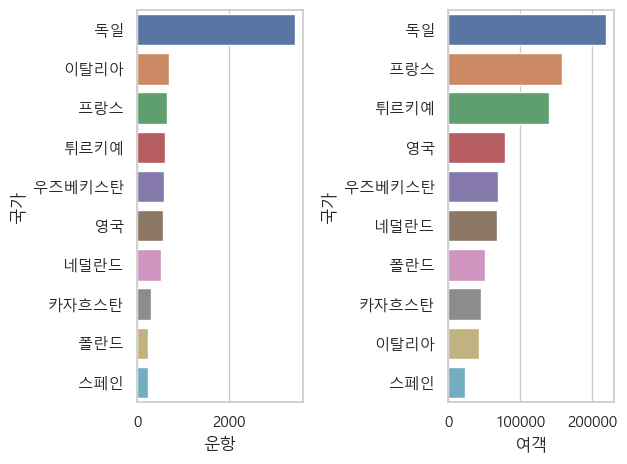

In [9]:
eur = flight[flight['지역']=='유럽']
eur = eur.sort_values('운항', ascending = False)[:10]
fig, ax = plt.subplots(ncols=2)
sns.barplot(data = eur,
           y = eur['국가'],
           x = eur['운항'], orient ='h', ax = ax[0])
eur = eur.sort_values('여객', ascending = False)
sns.barplot(data = eur,
           y = eur['국가'],
           x = eur['여객'], orient ='h', ax = ax[1])
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.tight_layout()

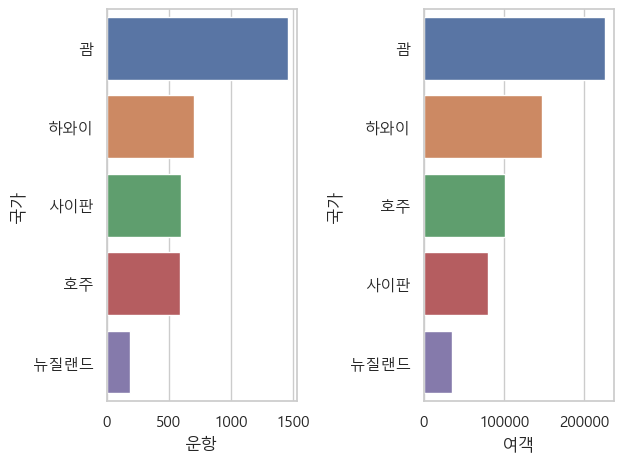

In [10]:
pac = flight[flight['지역']=='대양주']
pac = pac.sort_values('운항', ascending = False)[:10]
fig, ax = plt.subplots(ncols=2)
sns.barplot(data = pac,
           y = pac['국가'],
           x = pac['운항'], orient ='h', ax = ax[0])
pac = pac.sort_values('여객', ascending = False)
sns.barplot(data = pac,
           y = pac['국가'],
           x = pac['여객'], orient ='h', ax = ax[1])
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.tight_layout()

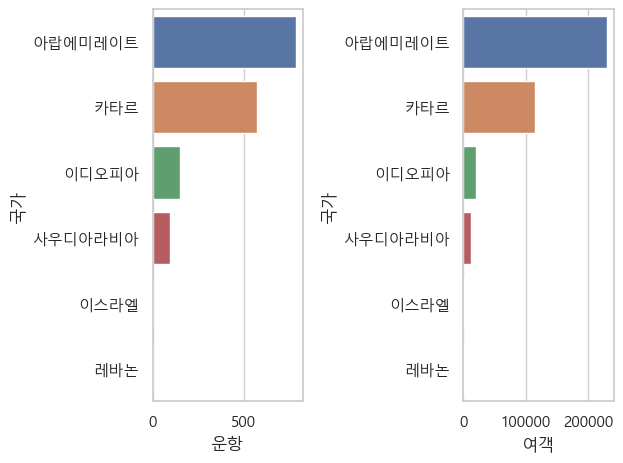

In [11]:
etc = flight[flight['지역']=='기타']
etc = etc.sort_values('운항', ascending = False)[:10]
fig, ax = plt.subplots(ncols=2)
sns.barplot(data = etc,
           y = etc['국가'],
           x = etc['운항'], orient ='h', ax = ax[0])
etc = etc.sort_values('여객', ascending = False)
sns.barplot(data = etc,
           y = etc['국가'],
           x = etc['여객'], orient ='h', ax = ax[1])
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.tight_layout()

In [13]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
joiner = pd.merge(flight, countries, left_on='iso', right_on='iso_a3', how='right')


In [14]:
del joiner['gdp_md_est']

In [15]:
del joiner['pop_est']

In [16]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

gdf = GeoDataFrame(joiner, crs="EPSG:4326", geometry=joiner['geometry'])

In [18]:
gdf.fillna(0, inplace = True)
gdf =  gdf[(gdf.name !='Antarctica')]
gdf


,지역,iso,국가,운항,여객,continent,name,iso_a3,geometry
0,0,0,0,0.0,0.0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,0,0,0,0.0,0.0,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,0,0,0,0.0,0.0,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,미주,CAN,캐나다,1424.0,241287.0,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,미주,USA,미국,20592.0,1385933.0,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...
172,0,0,0,0.0,0.0,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,0,0,0,0.0,0.0,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,0,0,0,0.0,0.0,Europe,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,0,0,0,0.0,0.0,North America,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


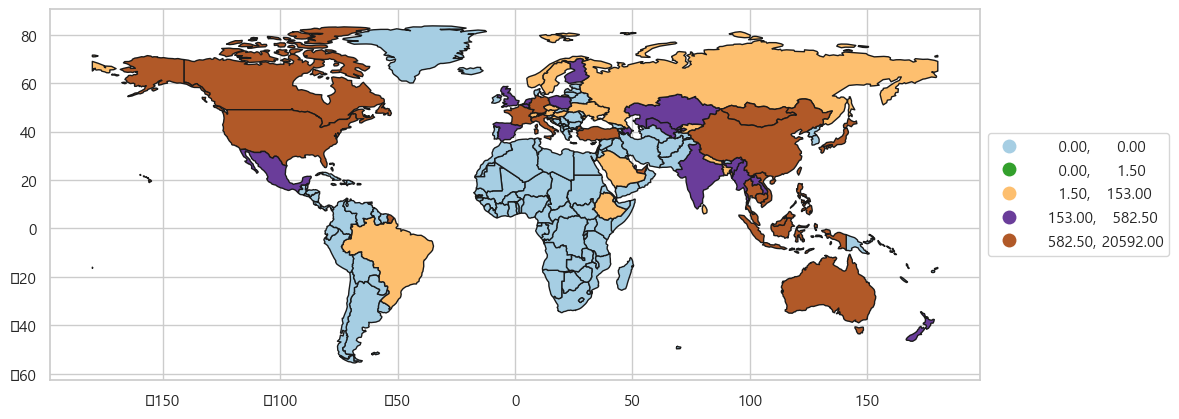

In [24]:

ax = gdf.plot(column='운항', scheme='quantiles', k=10, \
             cmap='Paired', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)}, edgecolor = 'k', figsize=(12,12))

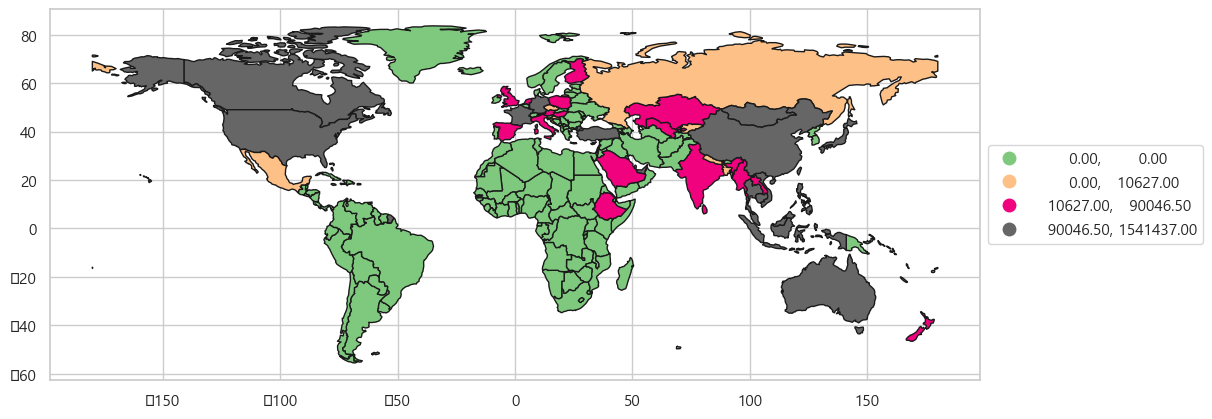

In [23]:

ax = gdf.plot(column='여객', scheme='quantiles', k=10, \
             cmap='Accent', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)}, edgecolor = 'k', figsize=(12,12))